<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/YOLOv8_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install leafmap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00


In [ ]:
import leafmap

# Create LeafMap Map object
m = leafmap.Map()

# Set center and zoom level of the map
m.center = (19.045589, 72.849362)  # Center coordinates (latitude, longitude)
m.zoom = 19  # Zoom level

# Add satellite basemap
m.add_basemap("SATELLITE")

# Define bounding box coordinates (min_lon, min_lat, max_lon, max_lat)
bbox = [72.8488, 19.0384, 72.8604, 19.0484]

# Draw the bounding box on the map
m.add_bbox(bbox=bbox, layer_name="Bounding Box")

# Display the map
m


AttributeError: 'Map' object has no attribute 'add_bbox'

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
import leafmap

# Create LeafMap Map object
m = leafmap.Map()

# Set center and zoom level of the map
m.center = (19.045589, 72.849362)  # Center coordinates (latitude, longitude)
m.zoom = 19  # Zoom level

# Add satellite basemap
m.add_basemap("SATELLITE")

# Define bounding box coordinates (min_lon, min_lat, max_lon, max_lat)
bbox = [72.8488, 19.0384, 72.8604, 19.0484]

# Create a GeoDataFrame representing the bounding box polygon
min_lon, min_lat, max_lon, max_lat = bbox
bbox_polygon = Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])
gdf = gpd.GeoDataFrame(geometry=[bbox_polygon])

# Add the bounding box polygon to the map
m.add_gdf(gdf, layer_name="Bounding Box")

# Display the map
m


Map(center=[19.045589, 72.849362], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [ ]:
import torch

# Load the pretrained DeepLab model
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()  # Set the model to evaluation mode


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 167MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
# Capture a screenshot of the map with the bounding box drawn
screenshot_path = "path/to/save/screenshot.png"
m.to_html("temp_map.html", screenshot_path)


In [ ]:
from PIL import Image

# Load the saved satellite image
satellite_image = Image.open("path/to/save/screenshot.png")

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the image to fit the model input size
    transforms.ToTensor(),          # Convert PIL Image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Preprocess the satellite image
input_tensor = transform(satellite_image).unsqueeze(0)  # Add a batch dimension

# Perform semantic segmentation using the pretrained DeepLab model
with torch.no_grad():
    output = model(input_tensor)['out'][0]  # Perform inference
    output_predictions = output.argmax(0)     # Get the predicted class index for each pixel

# Convert the predicted class indices to a segmentation mask
segmentation_mask = output_predictions.cpu().numpy().astype(np.uint8)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/save/screenshot.png'

In [ ]:
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

# Assuming you have the satellite imagery loaded and stored as `satellite_image`

# Convert the satellite image to PIL Image
satellite_image_pil = Image.fromarray(satellite_image)

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the image to fit the model input size
    transforms.ToTensor(),          # Convert PIL Image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Preprocess the satellite image
input_tensor = transform(satellite_image_pil).unsqueeze(0)  # Add a batch dimension

# Perform semantic segmentation using the pretrained DeepLab model
with torch.no_grad():
    output = model(input_tensor)['out'][0]  # Perform inference
    output_predictions = output.argmax(0)     # Get the predicted class index for each pixel

# Convert the predicted class indices to a segmentation mask
segmentation_mask = output_predictions.cpu().numpy().astype(np.uint8)


NameError: name 'satellite_image' is not defined

In [ ]:
from google.colab import files

# Upload the PNG file from your local computer to Colab
uploaded = files.upload()


Saving Artboard 1 copy 3.png to Artboard 1 copy 3.png


In [ ]:
# Save the uploaded PNG file to the current directory
with open("uploaded_image.png", "wb") as f:
    f.write(uploaded["Artboard 1 copy 3.png"])


In [ ]:
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms

# Load the uploaded PNG image
uploaded_image = Image.open("Artboard 1 copy 3.png")

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the image to fit the model input size
    transforms.ToTensor(),          # Convert PIL Image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Preprocess the uploaded image
input_tensor = transform(uploaded_image).unsqueeze(0)  # Add a batch dimension

# Assuming you already have the pretrained DeepLab model loaded
# Perform semantic segmentation using the pretrained DeepLab model
with torch.no_grad():
    output = model(input_tensor)['out'][0]  # Perform inference
    output_predictions = output.argmax(0)     # Get the predicted class index for each pixel

# Convert the predicted class indices to a segmentation mask
segmentation_mask = output_predictions.cpu().numpy().astype(np.uint8)

# Save the segmentation mask as an image
segmentation_mask_image = Image.fromarray(segmentation_mask)
segmentation_mask_image.save("segmentation_mask.png")


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [ ]:
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms

# Load the uploaded PNG image
uploaded_image = Image.open("uploaded_image.png")

# Remove the alpha channel if present
uploaded_image = uploaded_image.convert("RGB")

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the image to fit the model input size
    transforms.ToTensor(),          # Convert PIL Image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Preprocess the uploaded image
input_tensor = transform(uploaded_image).unsqueeze(0)  # Add a batch dimension

# Assuming you already have the pretrained DeepLab model loaded
# Perform semantic segmentation using the pretrained DeepLab model
with torch.no_grad():
    output = model(input_tensor)['out'][0]  # Perform inference
    output_predictions = output.argmax(0)     # Get the predicted class index for each pixel

# Convert the predicted class indices to a segmentation mask
segmentation_mask = output_predictions.cpu().numpy().astype(np.uint8)

# Save the segmentation mask as an image
segmentation_mask_image = Image.fromarray(segmentation_mask)
segmentation_mask_image.save("segmentation_mask.png")


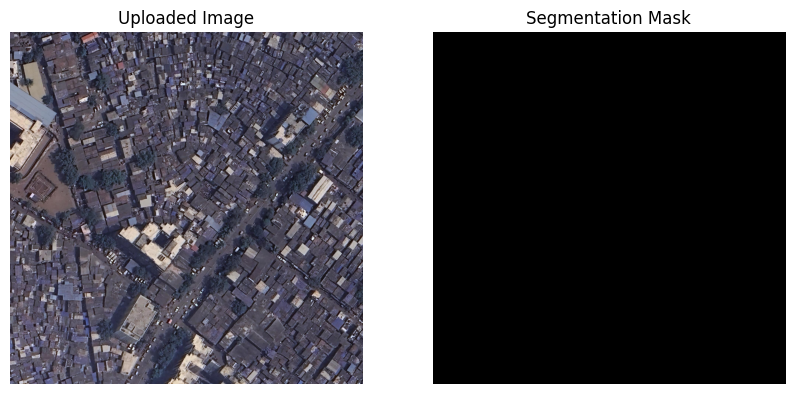

In [ ]:
import matplotlib.pyplot as plt

# Display the uploaded image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(uploaded_image)
plt.title("Uploaded Image")
plt.axis("off")

# Display the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask_image, cmap='gray')
plt.title("Segmentation Mask")
plt.axis("off")

plt.show()



In [ ]:
!pip install torch torchvision


In [ ]:
import torch
import torchvision.models as models

# Load a pretrained segmentation model (for example, FCN)
model = models.segmentation.fcn_resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:01<00:00, 74.6MB/s]


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the PNG image
image_path = 'Artboard 1 copy 3.png'
image = Image.open(image_path)

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image
    transforms.ToTensor(),           # Convert image to tensor
    # Add more transformations as needed
])

# Preprocess the image
input_image = transform(image).unsqueeze(0)  # Add a batch dimension

# Load the segmentation model
model = YourSegmentationModel()  # Initialize your segmentation model

# Perform inference
with torch.no_grad():
    model.eval()
    outputs = model(input_image)

# Post-process the segmentation mask if needed
segmentation_mask = outputs.argmax(1).squeeze().cpu().numpy()

# Visualize the original image and the segmentation mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask, cmap='gray')
plt.title("Segmentation Mask")
plt.axis("off")

plt.show()


NameError: name 'YourSegmentationModel' is not defined

In [ ]:
import torch
import torchvision.models.segmentation as segmentation
from PIL import Image
import matplotlib.pyplot as plt

# Load the input image
input_image = Image.open("Artboard 1 copy 3.png")

# Preprocess the input image
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch


NameError: name 'torchvision' is not defined

In [ ]:
import cv2
import torch

# Load the pretrained YOLO model (e.g., YOLOv5)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load a satellite image
image = cv2.imread('Artboard 1 copy 3.png')

# Perform object detection on the image
results = model(image)

# Display the results (bounding boxes and class labels)
results.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


AttributeError: module 'torchvision' has no attribute '__version__'

In [ ]:
!pip install torch torchvision
!pip install git+https://github.com/ultralytics/yolov5.git


  Cloning https://github.com/ultralytics/yolov5.git to /tmp/pip-req-build-jnhjhol6
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git /tmp/pip-req-build-jnhjhol6
  Resolved https://github.com/ultralytics/yolov5.git to commit b2ffe05569161b7af4e1e3bae617ae25f59d588f
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import cv2
import torch

# Load the pretrained YOLO model (YOLOv5)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load a satellite image
image = cv2.imread('Artboard 1 copy 3.png')

# Perform object detection on the image
results = model(image)

# Display the results (bounding boxes and class labels)
results.show()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


AttributeError: module 'torchvision' has no attribute '__version__'

In [ ]:
!pip install torch==1.10.0 torchvision==0.11.1

import cv2
import torch

# Load the pretrained YOLO model (YOLOv5)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load a satellite image
image = cv2.imread('Artboard 1 copy 3.png')

# Perform object detection on the image
results = model(image)

# Display the results (bounding boxes and class labels)
results.show()


ERROR: Could not find a version that satisfies the requirement torch==1.10.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1)
ERROR: No matching distribution found for torch==1.10.0


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


AttributeError: module 'torchvision' has no attribute '__version__'

In [ ]:
import torch

# Load the pretrained YOLO model (YOLOv5)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt', force_reload=True)

# Load a satellite image
image = "Artboard 1 copy 3.png"

# Perform object detection on the image
results = model(image)

# Display the results (bounding boxes and class labels)
results.show()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


AttributeError: module 'torchvision' has no attribute '__version__'

In [ ]:
import torch

# Load the pretrained YOLO model (YOLOv5)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load a satellite image
image = "Artboard 1 copy 3.png"

# Perform object detection on the image
results = model(image)

# Display the results (bounding boxes and class labels)
results.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


AttributeError: module 'torchvision' has no attribute '__version__'

In [ ]:
pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-674vi071
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-674vi071
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=ee87a53e36abecde7c71e25e50f2569e488439f56371ff2a0287bf6225d7338e
  Stored in directory: /tmp/pip-ephem-wheel-cache-sndmlgys/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
pip install opencv-python pycocotools matplotlib onnxruntime onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["<model_type>"](checkpoint="<path/to/checkpoint>")
predictor = SamPredictor(sam)
predictor.set_image(<your_image>)
masks, _, _ = predictor.predict(<input_prompts>)

SyntaxError: invalid syntax (<ipython-input-30-046cd8807f7e>, line 4)

In [ ]:
from segment_anything import sam_model_registry
sam = sam_model_registry["<model_type>"](checkpoint="<path/to/checkpoint>")

KeyError: '<model_type>'

In [9]:
pip install ultralytics

In [ ]:
!pip install --upgrade torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 756.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [10]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt") # load the model
results = model.train(data="coco128.yaml", epochs=100)
results = model("Artboard 1 copy 3.png")

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=coco128.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 



optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.044      1.543      1.231        200        640:  12%|█▎        | 1/8 [00:56<06:34, 56.38s/it]


KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt") # load the model
model=yolov8s.pt source="Artboard 1 copy 3.png"

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt") # load the model
results = model.train(data="coco128.yaml", epochs=100)
results = model("Artboard 1 copy 3.png")

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=coco128.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.002      1.084      1.174        197        640:  62%|██████▎   | 5/8 [03:41<02:07, 42.50s/it]